In [1]:
import xarray as xr

from linearsim import timeseries_from_seed, stats_from_seed

In [2]:
ds_all = xr.open_dataset('data/seeds/quantile_seeds_221112.nc')

In [3]:
ds_all

<xarray.Dataset>
Dimensions:              (n: 6, gamma: 3, v1: 16, quantiles_v1: 9, v2: 16, quantiles_v2: 9)
Coordinates:
  * n                    (n) int32 10 20 50 100 250 500
  * gamma                (gamma) float64 1.0 3.3 7.0
  * v1                   (v1) object 'Tz' 'Tm01' 'Hm0' 'Hs' ... 'k3' 'k4' 'HmHs'
  * quantiles_v1         (quantiles_v1) float64 0.01 0.05 0.1 ... 0.9 0.95 0.99
  * v2                   (v2) object 'Tz' 'Tm01' 'Hm0' 'Hs' ... 'k3' 'k4' 'HmHs'
  * quantiles_v2         (quantiles_v2) float64 0.01 0.05 0.1 ... 0.9 0.95 0.99
    dq                   float64 ...
    fft_min_duration     int32 ...
    dt                   float64 ...
    hs                   float64 ...
    tp                   float64 ...
Data variables:
    univariate_seeds     (n, gamma, v1, quantiles_v1) int32 ...
    multivariate_seeds   (n, gamma, v1, quantiles_v1, v2, quantiles_v2) int32 ...
    univariate_values    (n, gamma, v1, quantiles_v1) float32 ...
    multivariate_values  (n, gamma, v1, quantiles_v1, v2, quantiles_v2) float32 ...

# Check that timeseries values match percentiles

In [4]:
n=20
gamma=1
v1='Hs'

ds_seeds = ds_all["univariate_seeds"].sel(v1=v1,quantiles_v1=[0.05,0.95],n=n,gamma=gamma)
ds_values = ds_all["univariate_values"].sel(v1=v1,quantiles_v1=[0.05,0.95],n=n,gamma=gamma)
display(ds_values)
ds_values = stats_from_seed(ds_seeds)
display(ds_values[v1])

<xarray.DataArray 'univariate_values' (quantiles_v1: 2)>
array([0.829521, 1.172183], dtype=float32)
Coordinates:
    n                 int32 20
    gamma             float64 1.0
    v1                <U2 'Hs'
  * quantiles_v1      (quantiles_v1) float64 0.05 0.95
    dq                float64 0.01
    fft_min_duration  int32 512
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0
Attributes:
    description:  Values of v1 at quantile_v1

<xarray.DataArray 'Hs' (quantiles_v1: 2)>
array([0.82952147, 1.1721829 ])
Coordinates:
    n                 int32 20
    gamma             float64 1.0
    v1                <U2 'Hs'
    dq                float64 0.01
    fft_min_duration  int32 512
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0
  * quantiles_v1      (quantiles_v1) float64 0.05 0.95

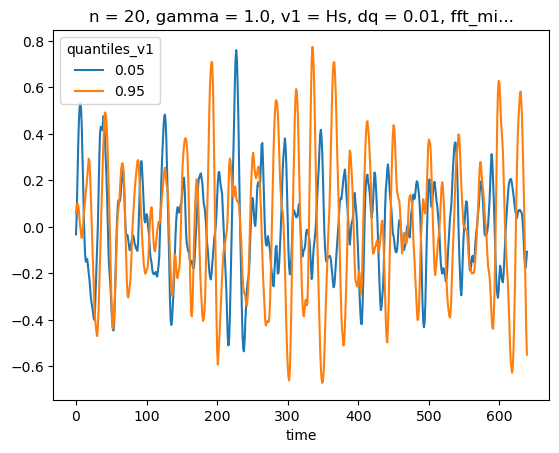

In [5]:
# Compare some timeseries at different points of joint distribution
da_timeseries = timeseries_from_seed(ds_seeds)
da_timeseries.plot(hue='quantiles_v1')

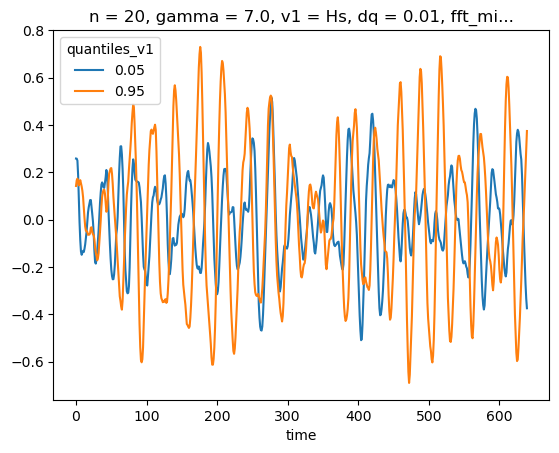

In [6]:
# Compare some timeseries at different gamma
n=20
gamma=7.0
ds_seeds = ds_all["univariate_seeds"].sel(v1=v1,quantiles_v1=[0.05,0.95],n=n,gamma=gamma)
da_timeseries = timeseries_from_seed(ds_seeds)
da_timeseries.plot(hue='quantiles_v1')

# Look at joint probability timeseries

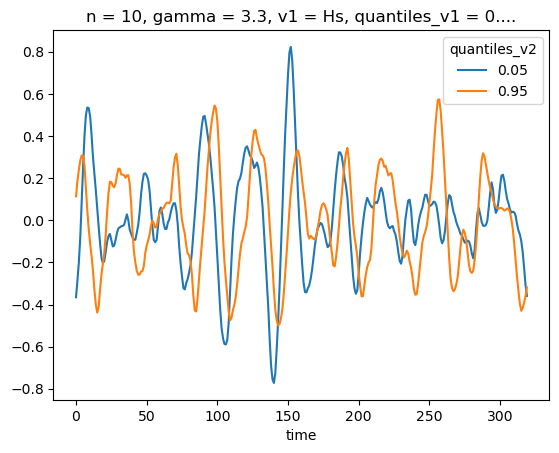

In [9]:
n=10
gamma=3.3
# Compare some timeseries at different points of joint distribution
ds_seeds = ds_all["multivariate_seeds"].sel(n=n,gamma=gamma,
                                            v1='Hs',
                                            quantiles_v1=0.5, # Median Hs
                                            v2='Tz',
                                            quantiles_v2=[0.05,0.95]
                                            )
da_timeseries = timeseries_from_seed(ds_seeds)
da_timeseries.plot(hue='quantiles_v2')

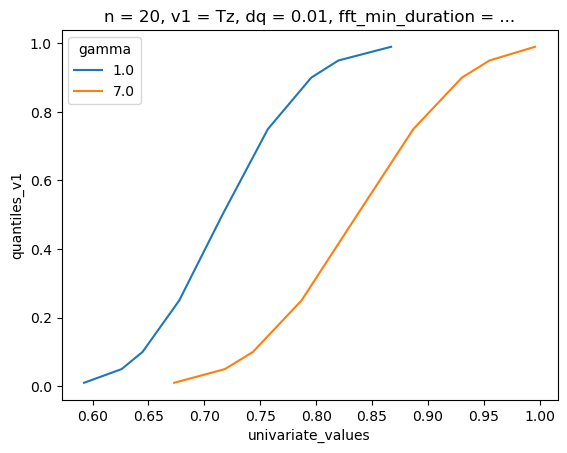

In [10]:
ds_all["univariate_values"].sel(v1="Tz",gamma=[1.0,7.0],n=20).plot(y="quantiles_v1",hue='gamma')

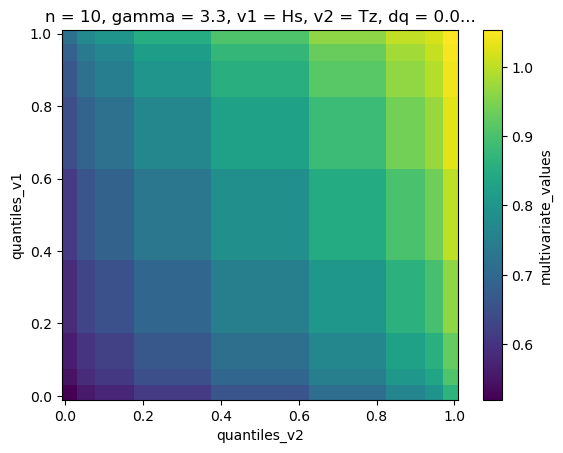

In [16]:
ds_all["multivariate_values"].sel(n=n,
                                  gamma=gamma,
                                  v1="Hs",
                                  v2="Tz").plot()

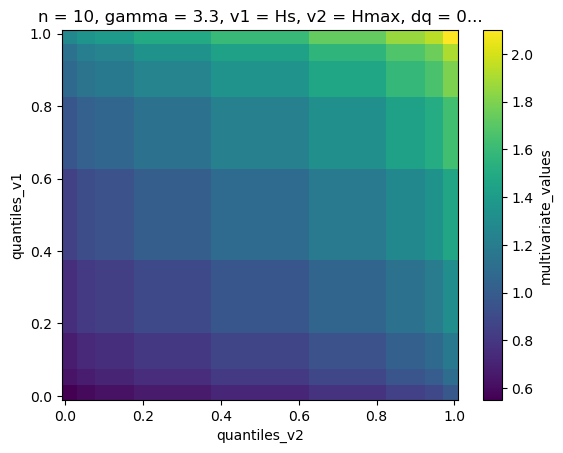

In [17]:
ds_all["multivariate_values"].sel(n=n,
                                  gamma=gamma,
                                  v1="Hs",
                                  v2="Hmax").plot()

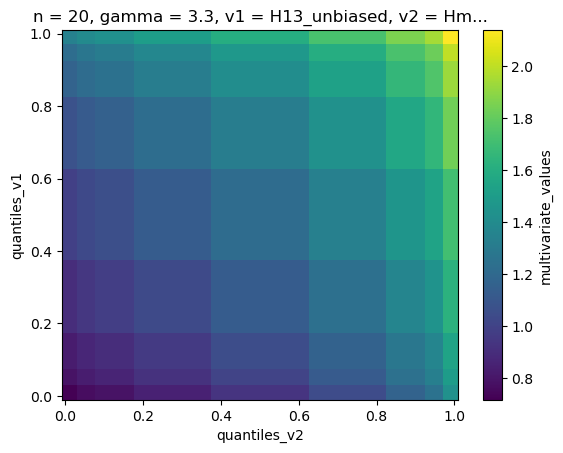

In [24]:
ds_all["multivariate_values"].sel(n=20,
                                  gamma=gamma,
                                  v1="H13_unbiased",
                                  v2="Hmax").plot()

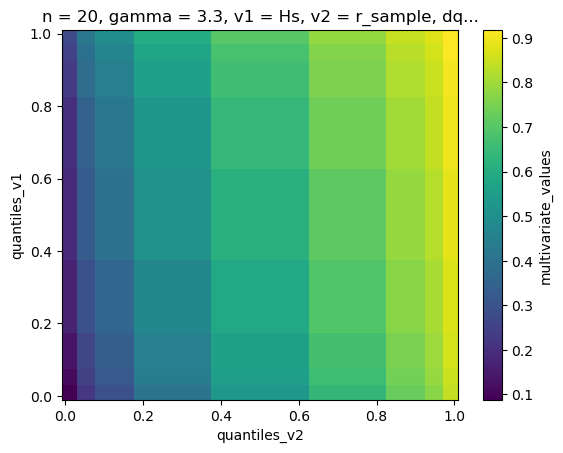

In [25]:
ds_all["multivariate_values"].sel(n=20,
                                  gamma=gamma,
                                  v1="Hs",
                                  v2="r_sample").plot()

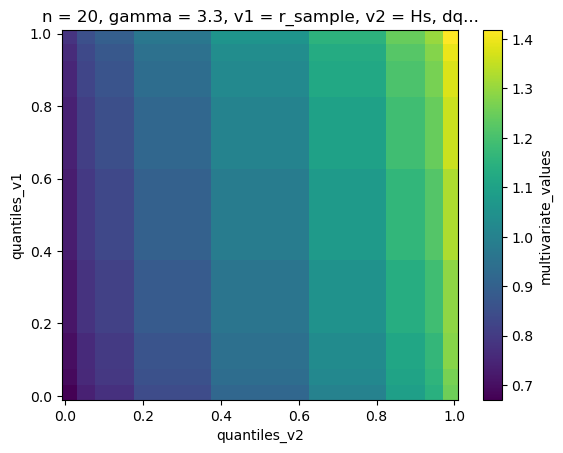

In [28]:
ds_all["multivariate_values"].sel(n=20,
                                  gamma=gamma,
                                  v1="r_sample",
                                  v2="Hs").plot()

(array([  8.,  30.,  96., 173., 280., 229., 298., 252.,  70.,  22.]),
 array([0.5186714 , 0.58896685, 0.6592623 , 0.72955775, 0.7998532 ,
        0.87014866, 0.9404441 , 1.0107396 , 1.081035  , 1.1513305 ,
        1.2216259 ], dtype=float32),
 <BarContainer object of 10 artists>)

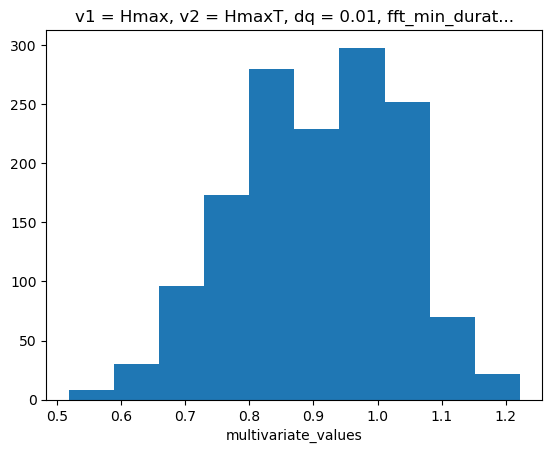

In [14]:
ds_all["multivariate_values"].sel(n=20,
                                  gamma=gamma,
                                  v1="r_sample",
                                  v2="Hs").plot()

In [12]:
ds_all["multivariate_values"].sel(v1="Hmax",v2="HmaxT").plot(hue="quantiles_v2")

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

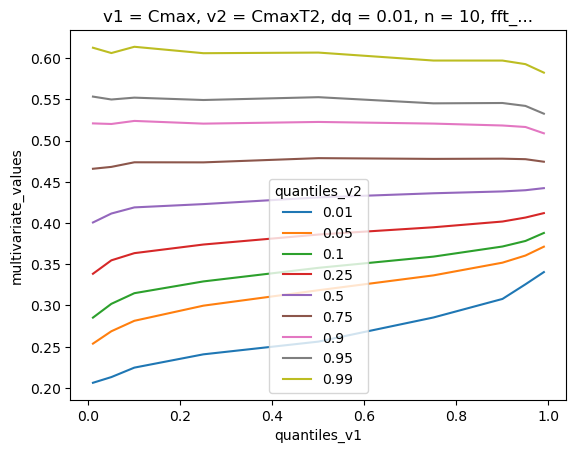

In [ ]:
ds_seeds["multivariate_values"].sel(v1="Cmax",v2="CmaxT2").plot(hue="quantiles_v2")

In [ ]:
joint_seeds.sel(v1="Hs",quantiles_v1=0.01,v2="Tz",quantiles_v2=0.99)

<xarray.DataArray ()>
array(865839998, dtype=int64)
Coordinates:
    v2            <U12 'Tz'
    quantiles_v2  float64 0.99
    quantiles_v1  float64 0.01
    v1            <U12 'Hs'

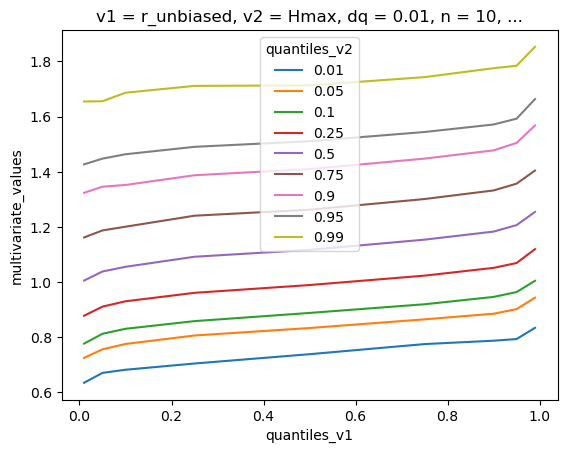

In [ ]:
ds_seeds["multivariate_values"].sel(v1="r_unbiased",v2="Hmax").plot(hue="quantiles_v2")

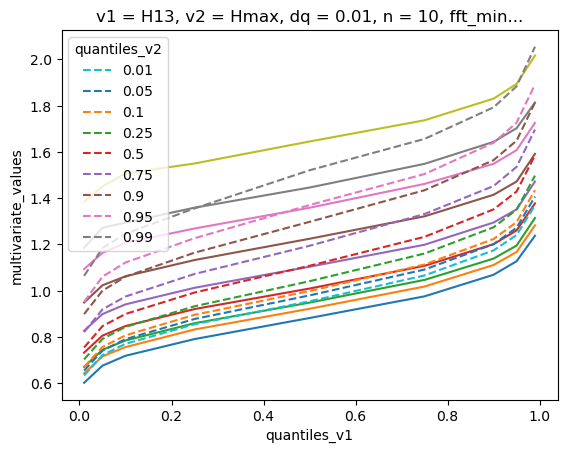

In [ ]:
ds_seeds["multivariate_values"].sel(v1="H13_unbiased",v2="Hmax").plot(hue="quantiles_v2")
ds_seeds["multivariate_values"].sel(v1="H13",v2="Hmax").plot(hue="quantiles_v2",ls='--')

In [ ]:
df=ds.isel(gamma=0,n=0).set_index({'seed':'this_seed'}).to_dask_dataframe()
# df

In [ ]:
#[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
df_q=df.quantile(d_quantiles,method='tdigest')
df_q

Dask DataFrame Structure:
                  seed    gamma        n fft_min_duration       dt       hs       tp       Tz     Tm01      Hm0       Hs      H13 H13_unbiased     Hmax    HmaxT     Cmax   CmaxT2 r_spectra r_sample r_unbiased       k3       k4
npartitions=1                                                                                                                                                                                                                     
0.005          float64  float64  float64          float64  float64  float64  float64  float64  float64  float64  float64  float64      float64  float64  float64  float64  float64   float64  float64    float64  float64  float64
0.995              ...      ...      ...              ...      ...      ...      ...      ...      ...      ...      ...      ...          ...      ...      ...      ...      ...       ...      ...        ...      ...      ...
Dask Name: quantiles-concat, 19927 tasks

In [ ]:
with dask.config.set(scheduler='threads'):
    with ProgressBar():
        df_q = df_q.compute()

[########################################] | 100% Completed | 5.21 sms


In [ ]:
df_q

seed  gamma     n  fft_min_duration       dt   hs   tp  \
0.005  5.240457e+06    1.0  10.0             512.0  0.03125  1.0  1.0   
0.015  1.531632e+07    1.0  10.0             512.0  0.03125  1.0  1.0   
0.045  4.525848e+07    1.0  10.0             512.0  0.03125  1.0  1.0   
0.055  5.533321e+07    1.0  10.0             512.0  0.03125  1.0  1.0   
0.095  9.520794e+07    1.0  10.0             512.0  0.03125  1.0  1.0   
0.105  1.051711e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.245  2.453845e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.255  2.553471e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.495  4.949182e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.505  5.048477e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.745  7.453707e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.755  7.552941e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.895  8.951539e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.905  9.050198e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.945  9.447445e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.955  9.546565e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.985  9.845710e+08    1.0  10.0             512.0  0.03125  1.0  1.0   
0.995  9.948140e+08    1.0  10.0             512.0  0.03125  1.0  1.0   

             Tz      Tm01       Hm0  ...  H13_unbiased      Hmax     HmaxT  \
0.005  0.529681  0.753044  0.946608  ...      0.523712  0.688345  0.574556   
0.015  0.555000  0.756070  0.954813  ...      0.564706  0.745088  0.615560   
0.045  0.585935  0.759523  0.964504  ...      0.615876  0.815214  0.666410   
0.055  0.592688  0.760221  0.966496  ...      0.626578  0.830469  0.677025   
0.095  0.612692  0.762314  0.972421  ...      0.659619  0.877168  0.708953   
0.105  0.616839  0.762721  0.973599  ...      0.666328  0.886661  0.715488   
0.245  0.658765  0.766841  0.985252  ...      0.735104  0.985800  0.780251   
0.255  0.661270  0.767072  0.985899  ...      0.739076  0.991749  0.783952   
0.495  0.713876  0.771792  0.999364  ...      0.824862  1.119490  0.860712   
0.505  0.716176  0.771975  0.999890  ...      0.828383  1.124677  0.863721   
0.745  0.773413  0.776684  1.013497  ...      0.920611  1.270459  0.943246   
0.755  0.776425  0.776910  1.014158  ...      0.925282  1.278031  0.947204   
0.895  0.829582  0.781012  1.026217  ...      1.011907  1.421569  1.019381   
0.905  0.835495  0.781440  1.027423  ...      1.020892  1.436777  1.026844   
0.945  0.864193  0.783541  1.033609  ...      1.067359  1.516690  1.065204   
0.955  0.874094  0.784246  1.035722  ...      1.083488  1.544759  1.078485   
0.985  0.924329  0.787742  1.045920  ...      1.165030  1.688245  1.143943   
0.995  0.968495  0.790729  1.054746  ...      1.238648  1.817971  1.201518   

           Cmax    CmaxT2  r_spectra  r_sample  r_unbiased        k3        k4  
0.005  0.358582  0.227322   0.655059 -0.232660   -0.406146 -0.497222 -0.997977  
0.015  0.389610  0.263051   0.659131 -0.099598   -0.280039 -0.410123 -0.922066  
0.045  0.428070  0.308177   0.663819  0.049769   -0.127830 -0.314038 -0.821049  
0.055  0.436264  0.316531   0.664779  0.080369   -0.096191 -0.294947 -0.798367  
0.095  0.461910  0.339304   0.667615  0.168638   -0.003234 -0.240088 -0.728165  
0.105  0.467138  0.343678   0.668167  0.185748    0.015048 -0.229098 -0.713530  
0.245  0.522188  0.383769   0.673647  0.351084    0.193150 -0.124570 -0.553763  
0.255  0.525429  0.385880   0.673952  0.360254    0.202898 -0.118767 -0.543834  
0.495  0.596896  0.429064   0.680173  0.535400    0.398007 -0.002070 -0.313911  
0.505  0.599853  0.430714   0.680415  0.541885    0.405257  0.002352 -0.303721  
0.745  0.680956  0.474905   0.686575  0.689712    0.581586  0.119217 -0.004245  
0.755  0.685188  0.477109   0.686874  0.696166    0.589349  0.125020  0.012485  
0.895  0.765280  0.518395   0.692201  0.796316    0.717153  0.229167  0.357394  
0.905  0.7

In [ ]:
df=ds.isel(gamma=0,n=0).to_dataframe().set_index('this_seed')

In [ ]:
df.head()

gamma   n  fft_min_duration       dt   hs   tp        Tz      Tm01  \
this_seed                                                                       
613043285    1.0  10               512  0.03125  1.0  1.0  0.614008  0.764239   
601222553    1.0  10               512  0.03125  1.0  1.0  0.734426  0.778792   
246478935    1.0  10               512  0.03125  1.0  1.0  0.604834  0.784933   
900722712    1.0  10               512  0.03125  1.0  1.0  0.723358  0.783251   
593816217    1.0  10               512  0.03125  1.0  1.0  0.840854  0.778125   

                Hm0        Hs  ...  H13_unbiased      Hmax     HmaxT  \
this_seed                      ...                                     
613043285  0.983886  0.779678  ...      0.549376  0.864583  1.001503   
601222553  1.038404  1.107644  ...      1.052608  1.290794  0.723803   
246478935  1.057621  0.790826  ...      0.654316  0.913551  0.762127   
900722712  1.042372  1.188087  ...      1.064278  1.251791  1.038830   
593816217  1.004940  1.168344  ...      0.956215  1.480193  0.888444   

               Cmax    CmaxT2  r_spectra  r_sample  r_unbiased        k3  \
this_seed                                                                  
613043285  0.453183  0.500752   0.656764  0.201882   -0.148055  0.278434   
601222553  0.662209  0.358244   0.687148  0.697556    0.592258 -0.009774   
246478935  0.493921  0.266406   0.690518  0.375839    0.068102  0.231941   
900722712  0.659998  0.519415   0.685776  0.928086    0.906521  0.274991   
593816217  0.791395  0.444222   0.671390  0.680336    0.307050  0.089566   

                 k4  
this_seed            
613043285 -0.071051  
601222553 -0.297866  
246478935 -0.508159  
900722712 -0.562422  
593816217 -0.341006  

[5 rows x 21 columns]

In [ ]:

# df_sorted

In [ ]:
s = int(0.005*len(df_sorted))
e = int(0.015*len(df_sorted))

In [ ]:
df_nested_subset = df_sorted.iloc[s:e]
df_nested_subset

gamma   n  fft_min_duration       dt   hs   tp        Tz      Tm01  \
seed                                                                            
570159322    1.0  10               512  0.03125  1.0  1.0  0.530267  0.763631   
967435114    1.0  10               512  0.03125  1.0  1.0  0.530269  0.773693   
970105475    1.0  10               512  0.03125  1.0  1.0  0.530290  0.781474   
439195793    1.0  10               512  0.03125  1.0  1.0  0.530293  0.775736   
101227343    1.0  10               512  0.03125  1.0  1.0  0.530294  0.778461   
...          ...  ..               ...      ...  ...  ...       ...       ...   
38139560     1.0  10               512  0.03125  1.0  1.0  0.555235  0.761963   
305494277    1.0  10               512  0.03125  1.0  1.0  0.555238  0.780239   
558753439    1.0  10               512  0.03125  1.0  1.0  0.555241  0.779940   
421123233    1.0  10               512  0.03125  1.0  1.0  0.555244  0.762931   
609794214    1.0  10               512  0.03125  1.0  1.0  0.555246  0.760325   

                Hm0        Hs  ...  H13_unbiased      Hmax     HmaxT  \
seed                           ...                                     
570159322  0.945451  0.878837  ...      0.735239  1.089090  0.956605   
967435114  0.993607  0.893878  ...      0.764134  1.054731  0.733850   
970105475  0.991429  0.811613  ...      0.644073  0.912034  0.740304   
439195793  1.000857  0.735995  ...      0.527152  0.900909  0.819040   
101227343  1.017319  0.858710  ...      0.689190  1.125384  0.853047   
...             ...       ...  ...           ...       ...       ...   
38139560   0.998364  0.871696  ...      0.563882  1.313472  0.914103   
305494277  1.028611  0.836853  ...      0.623824  0.957391  0.604496   
558753439  1.030677  1.048222  ...      0.876360  1.087562  0.821261   
421123233  0.980188  0.852803  ...      0.666899  0.890391  0.769800   
609794214  0.971728  0.805969  ...      0.617198  1.165811  0.727007   

               Cmax    CmaxT2  r_spectra  r_sample  r_unbiased        k3  \
seed                                                                       
570159322  0.604156  0.322459   0.669570  0.492661    0.274499  0.036493   
967435114  0.565689  0.416179   0.670705  0.652203    0.631832 -0.161004   
970105475  0.497091  0.282853   0.667478  0.297039    0.103355  0.142048   
439195793  0.521776  0.409520   0.671634  0.597419    0.274637  0.134959   
101227343  0.630731  0.426524   0.697179  0.873941    0.873742  0.207496   
...             ...       ...        ...       ...         ...       ...   
38139560   0.546469  0.457052   0.680041  0.744650    0.177965 -0.201433   
305494277  0.471954  0.302248   0.678768  0.591519    0.434609 -0.107286   
558753439  0.650469  0.532776   0.676661  0.704634    0.646286  0.336497   
421123233  0.368973  0.389265   0.674623  0.539237    0.580654 -0.137243   
609794214  0.571319  0.363504   0.673273  0.865742    0.607677 -0.075776   

                 k4  
seed                 
570159322  0.050819  
967435114  0.113175  
970105475 -0.333182  
439195793 -0.107747  
101227343  0.343701  
...             ...  
38139560   1.173802  
305494277  0.110200  
558753439 -0.320442  
421123233 -0.092863  
609794214  0.388454  

[10000 rows x 21 columns]

In [ ]:
df_nested_sorted = df_nested_subset.sort_values('Hs')
idx = (quantiles*len(df_nested_sorted)).astype(int)
df_nested_quantiles = df_nested_sorted.iloc[idx]
df_nested_quantiles

gamma   n  fft_min_duration       dt   hs   tp        Tz      Tm01  \
seed                                                                            
236427657    1.0  10               512  0.03125  1.0  1.0  0.545627  0.767064   
577164448    1.0  10               512  0.03125  1.0  1.0  0.531481  0.783279   
586982222    1.0  10               512  0.03125  1.0  1.0  0.541304  0.780611   
818015682    1.0  10               512  0.03125  1.0  1.0  0.541919  0.768492   
326591546    1.0  10               512  0.03125  1.0  1.0  0.553996  0.763872   
125989664    1.0  10               512  0.03125  1.0  1.0  0.535632  0.773410   
285262839    1.0  10               512  0.03125  1.0  1.0  0.544972  0.778345   
521251827    1.0  10               512  0.03125  1.0  1.0  0.535685  0.772964   
910797177    1.0  10               512  0.03125  1.0  1.0  0.554895  0.768532   

                Hm0        Hs  ...  H13_unbiased      Hmax     HmaxT  \
seed                           ...                                     
236427657  0.992499  0.589409  ...      0.426672  0.631541  0.504910   
577164448  1.044488  0.653807  ...      0.543790  0.787060  0.679828   
586982222  1.014125  0.687672  ...      0.524946  0.812731  0.856730   
818015682  0.974807  0.748424  ...      0.547970  0.696036  0.672071   
326591546  0.978528  0.822223  ...      0.642753  0.928274  0.773442   
125989664  1.000965  0.903469  ...      0.677928  1.112931  0.901812   
285262839  0.989691  0.979004  ...      0.806435  1.233740  0.826960   
521251827  1.025669  1.026317  ...      0.662503  1.441221  0.840518   
910797177  0.975318  1.122177  ...      0.834827  1.446523  0.945619   

               Cmax    CmaxT2  r_spectra  r_sample  r_unbiased        k3  \
seed                                                                       
236427657  0.349548  0.304544   0.675256  0.140082   -0.081682 -0.068875   
577164448  0.444047  0.339914   0.699844  0.127319   -0.049844 -0.033746   
586982222  0.406379  0.428365   0.687185  0.553664    0.317804  0.068966   
818015682  0.454455  0.187964   0.677029 -0.206283   -0.225191 -0.158672   
326591546  0.455851  0.386721   0.671834  0.616702    0.425244 -0.023930   
125989664  0.735310  0.450906   0.693493  0.306120    0.302687  0.111259   
285262839  0.750167  0.413480   0.672877  0.613830    0.816322 -0.223200   
521251827  0.655258  0.420259   0.688395  0.885808    0.571633 -0.241071   
910797177  0.779696  0.293721   0.658583  0.451678    0.188722  0.185427   

                 k4  
seed                 
236427657 -0.282944  
577164448  0.759701  
586982222 -0.118251  
818015682 -0.269141  
326591546 -0.686896  
125989664  0.254095  
285262839  0.724756  
521251827  0.550815  
910797177  0.741567  

[9 rows x 21 columns]

In [ ]:
import seaborn as sns

In [ ]:
df_nested_quantiles[ds_c.data_vars].corr()

Tz      Tm01       Hm0        Hs       H13  H13_unbiased  \
Tz            1.000000 -0.675231 -0.816813  0.293011  0.311178      0.355455   
Tm01         -0.675231  1.000000  0.757318 -0.155983 -0.023008     -0.025248   
Hm0          -0.816813  0.757318  1.000000 -0.266159 -0.206515     -0.308144   
Hs            0.293011 -0.155983 -0.266159  1.000000  0.970357      0.929512   
H13           0.311178 -0.023008 -0.206515  0.970357  1.000000      0.977193   
H13_unbiased  0.355455 -0.025248 -0.308144  0.929512  0.977193      1.000000   
Hmax          0.153392 -0.006830 -0.035025  0.962842  0.951451      0.869444   
HmaxT         0.120347  0.177161 -0.050899  0.786475  0.801712      0.783177   
Cmax          0.093135  0.046712 -0.171993  0.919033  0.923102      0.921476   
CmaxT2       -0.246608  0.398309  0.422929  0.227328  0.310143      0.247272   
r_spectra    -0.936081  0.647220  0.849207 -0.417231 -0.407199     -0.445475   
r_sample      0.159697  0.086633  0.178956  0.565192  0.608539      0.487682   
r_unbiased    0.119081  0.184085  0.035548  0.602081  0.678403      0.637434   
k3            0.278171 -0.059369 -0.140308  0.047524  0.083396      0.116245   
k4           -0.342295  0.585058  0.429332  0.528259  0.605439      0.565904   

                  Hmax     HmaxT      Cmax    CmaxT2  r_spectra  r_sample  \
Tz            0.153392  0.120347  0.093135 -0.246608  -0.936081  0.159697   
Tm01         -0.006830  0.177161  0.046712  0.398309   0.647220  0.086633   
Hm0          -0.035025 -0.050899 -0.171993  0.422929   0.849207  0.178956   
Hs            0.962842  0.786475  0.919033  0.227328  -0.417231  0.565192   
H13           0.951451  0.801712  0.923102  0.310143  -0.407199  0.608539   
H13_unbiased  0.869444  0.783177  0.921476  0.247272  -0.445475  0.487682   
Hmax          1.000000  0.780358  0.893466  0.389203  -0.263794  0.695828   
HmaxT         0.780358  1.000000  0.766224  0.504776  -0.105224  0.580663   
Cmax          0.893466  0.766224  1.000000  0.315734  -0.239962  0.417253   
CmaxT2        0.389203  0.504776  0.315734  1.000000   0.395569  0.754483   
r_spectra    -0.263794 -0.105224 -0.239962  0.395569   1.000000 -0.083202   
r_sample      0.695828  0.580663  0.417253  0.754483  -0.083202  1.000000   
r_unbiased    0.671490  0.595999  0.577601  0.767963  -0.094650  0.877680   
k3            0.027900  0.389351  0.107776  0.066080  -0.125449 -0.106906   
k4            0.631403  0.420585  0.669161  0.187182   0.147349  0.223840   

              r_unbiased        k3        k4  
Tz              0.119081  0.278171 -0.342295  
Tm01            0.184085 -0.059369  0.585058  
Hm0             0.035548 -0.140308  0.429332  
Hs              0.602081  0.047524  0.528259  
H13             0.678403  0.083396  0.605439  
H13_unbiased    0.637434  0.116245  0.565904  
Hmax            0.671490  0.027900  0.631403  
HmaxT           0.595999  0.389351  0.420585  
Cmax            0.577601  0.107776  0.669161  
CmaxT2          0.767963  0.066080  0.187182  
r_spectra      -0.094650 -0.125449  0.147349  
r_sample        0.877680 -0.106906  0.223840  
r_unbiased      1.000000 -0.253165  0.289050  
k3             -0.253165  1.000000 -0.019604  
k4              0.289050 -0.019604  1.000000

<AxesSubplot:>

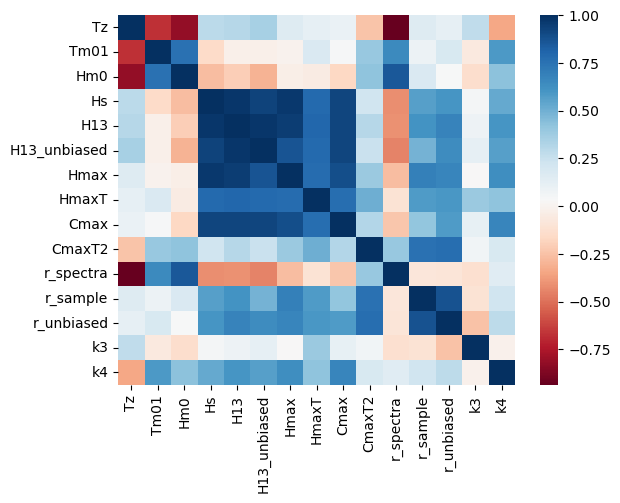

In [ ]:
sns.heatmap(df_nested_quantiles[ds_c.data_vars].corr(),cmap='RdBu')

In [ ]:
this_subset

<xarray.DataArray 'Tz' (seed: 10000)>
array([0.79799493, 0.79923923, 0.79730673, ..., 0.79977068, 0.80072025,
       0.80036048])
Coordinates:
    fft_min_duration  int32 512
  * seed              (seed) int64 359 379 815 922 931 ... 9432 9513 9752 9911
    this_seed         (seed) int32 855784813 61151058 ... 339783098 818563112
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0
    pp                object (500, 7.0)

In [ ]:
up_bound

<xarray.DataArray 'Tz' ()>
array(0.80221801)
Coordinates:
    fft_min_duration  int32 512
    quantile          float64 0.015
    pp                object (500, 7.0)
    dt                float64 ...
    hs                float64 ...
    tp                float64 ...

In [ ]:
this_subset.groupby()

<xarray.DataArray 'Tz' (gamma: 3, n: 6)>
array([[       nan, 0.59191616,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan]])
Coordinates:
  * gamma             (gamma) float64 1.0 3.3 7.0
  * n                 (n) int32 10 20 50 100 250 500
    fft_min_duration  (n) int32 512 512 512 512 512 512
    seed              int64 23
    this_seed         (gamma, n) int32 832040280 30797849 ... 406590246
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0

In [ ]:
low_bound

<xarray.Dataset>
Dimensions:           (gamma: 3, n: 6)
Coordinates:
  * gamma             (gamma) float64 1.0 3.3 7.0
  * n                 (n) int32 10 20 50 100 250 500
    fft_min_duration  (n) int32 512 512 512 512 512 512
    quantile          float64 0.005
Data variables: (12/16)
    this_seed         (gamma, n) float64 5.081e+06 4.934e+06 ... 4.913e+06
    Tz                (gamma, n) float64 0.5303 0.5803 0.6279 ... 0.7814 0.7964
    Tm01              (gamma, n) float64 0.7531 0.7531 0.7531 ... 0.8568 0.8568
    Hm0               (gamma, n) float64 0.9467 0.9466 0.9467 ... 0.9164 0.9161
    Hs                (gamma, n) float64 0.6593 0.7471 0.8345 ... 0.8824 0.9154
    H13               (gamma, n) float64 0.5931 0.6914 0.7845 ... 0.8518 0.8856
    ...                ...
    CmaxT2            (gamma, n) float64 0.2276 0.2498 0.278 ... 0.4018 0.4079
    r_spectra         (gamma, n) float64 0.6551 0.6551 0.6552 ... 0.7826 0.7826
    r_sample          (gamma, n) float64 -0.2298 0.04904 0.2548 ... 0.589 0.6277
    r_unbiased        (gamma, n) float64 -0.4051 -0.05491 ... 0.5718 0.6171
    k3                (gamma, n) float64 -0.4957 -0.3518 ... -0.07776 -0.05492
    k4                (gamma, n) float64 -0.9968 -0.8052 ... -0.407 -0.3059

In [ ]:
low_tail = ds.where(ds < low_bound,drop=True)
with dask.config.set(scheduler='threads'):
    with ProgressBar():
        low_tail = low_tail.compute()

[########################################] | 100% Completed | 3.04 sms


In [ ]:
low_tail

<xarray.Dataset>
Dimensions:           (gamma: 3, n: 6, seed: 639990)
Coordinates:
  * gamma             (gamma) float64 1.0 3.3 7.0
  * n                 (n) int32 10 20 50 100 250 500
    fft_min_duration  (n) int32 512 512 512 512 512 512
  * seed              (seed) int64 3 4 7 9 10 11 ... 9992 9993 9996 9997 9999
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0
    quantile          float64 0.005
Data variables: (12/16)
    this_seed         (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    Tz                (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    Tm01              (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    Hm0               (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    Hs                (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    H13               (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    ...                ...
    CmaxT2            (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    r_spectra         (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    r_sample          (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    r_unbiased        (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    k3                (gamma, n, seed) float64 nan nan nan nan ... nan nan nan
    k4                (gamma, n, seed) float64 nan nan nan nan ... nan nan nan

In [ ]:
ds_subset=ds.where((ds>q_low) & (ds<q_high),drop=True)

ValueError: Dimensions {'quantile'} do not exist. Expected one or more of Frozen({'gamma': 3, 'n': 6, 'seed': 1000000})

In [ ]:
ds_subset

<xarray.Dataset>
Dimensions:           (gamma: 3, n: 6, seed: 1000000, quantile: 0)
Coordinates:
  * gamma             (gamma) float64 1.0 3.3 7.0
  * n                 (n) int32 10 20 50 100 250 500
    fft_min_duration  (n) int32 512 512 512 512 512 512
  * seed              (seed) int64 0 1 2 3 4 5 ... 9994 9995 9996 9997 9998 9999
    dt                float64 0.03125
    hs                float64 1.0
    tp                float64 1.0
  * quantile          (quantile) float64 
Data variables: (12/16)
    this_seed         (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    Tz                (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    Tm01              (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    Hm0               (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    Hs                (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    H13               (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    ...                ...
    CmaxT2            (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    r_spectra         (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    r_sample          (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    r_unbiased        (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    k3                (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>
    k4                (gamma, n, seed, quantile) float64 dask.array<chunksize=(3, 6, 10000, 0), meta=np.ndarray>

In [ ]:
ds=xr.open_dataset(f'data/timeseries_stats/RAS_n{n_seed}{suffix}.nc')
ds

<xarray.Dataset>
Dimensions:           (gamma: 16, n: 25, seed: 25000)
Coordinates:
  * gamma             (gamma) float64 1.0 1.5 2.0 2.5 3.0 ... 6.5 7.0 7.5 8.0
  * n                 (n) int32 10 12 14 16 18 20 25 ... 250 300 350 400 450 500
    fft_min_duration  (n) int32 ...
  * seed              (seed) int32 0 1 2 3 4 5 ... 24995 24996 24997 24998 24999
    dt                float64 ...
    hs                float64 ...
    tp                float64 ...
Data variables: (12/16)
    this_seed         (gamma, n, seed) int32 ...
    Tz                (gamma, n, seed) float64 ...
    Tm01              (gamma, n, seed) float64 ...
    Hm0               (gamma, n, seed) float64 ...
    Hs                (gamma, n, seed) float64 ...
    H13               (gamma, n, seed) float64 ...
    ...                ...
    CmaxT2            (gamma, n, seed) float64 ...
    r_spectra         (gamma, n, seed) float64 ...
    r_sample          (gamma, n, seed) float64 ...
    r_unbiased        (gamma, n, seed) float64 ...
    k3                (gamma, n, seed) float64 ...
    k4                (gamma, n, seed) float64 ...

# Take a look at results with interactive plots

In [ ]:
import hvplot.xarray
import holoviews as hv

In [ ]:
ds['HmHs'] = ds['Hmax']/ds['Hs']
ds_std = ds.std(dim='seed').load()
ds_mean = ds.mean(dim='seed').load()
ds_max = ds.max(dim='seed').load()
ds_CV = ds_std/ds_mean
ds_CV = ds_CV.load()

In [ ]:
layout = []
for v in ds_mean.data_vars:
    layout.append(ds_mean[v].hvplot.quadmesh(x='n',y='gamma',cmap='viridis',aspect=1,title=v,logx=True))
layout = hv.Layout(layout).cols(3)

hv.save(layout,filename=f"figures/timeseries_stats/RAS_Mean{suffix}.html")

In [ ]:
layout = []
for v in ds_CV.data_vars:
    layout.append(ds_CV[v].hvplot.quadmesh(x='n',y='gamma',cmap='viridis',aspect=1,title=v,logx=True))
layout = hv.Layout(layout).cols(3)

hv.save(layout,filename=f"figures/timeseries_stats/RAS_CV{suffix}.html")

In [ ]:
layout = []
for v in ds_max.data_vars:
    layout.append(ds_max[v].hvplot.quadmesh(x='n',y='gamma',cmap='viridis',aspect=1,title=v,logx=True))
layout = hv.Layout(layout).cols(3)

hv.save(layout,filename=f"figures/timeseries_stats/RAS_Max{suffix}.html")

## Take a look at the largest wave events, largest wave and largest 'rogue'

In [ ]:
hv.extension('bokeh')

In [ ]:
ds=xr.open_dataset(f'data/timeseries_stats/RAS_n{n_seed}{suffix}.nc').chunk('auto')
ds['HmHs'] = ds['Hmax']/ds['Hs']
ds_stacked = ds.stack(sample=['n','gamma','seed'])

In [ ]:
im=ds_stacked.Hmax.argmax().load()
largest_wave = ds_stacked.isel(sample=int(im)).load()
display(largest_wave)
duration, gamma,_ = np.array(largest_wave.sample.values.item())
seed = int(largest_wave.this_seed)
ts=time_domain_ras(float(ds['tp']),float(ds['hs']),gamma,duration,dt=float(ds['dt']),seed=seed,fft_equiv_duration=largest_wave.fft_min_duration,return_ts=True)
da_ts = xr.DataArray(ts,dims='time',coords={'time':np.arange(0,duration,ds['dt'])},name='timeseries')

# Double check that that the time series is generates correctly
from linearsim import wave_stats
print(f'ts statistics: {wave_stats(ts,1/float(ds["dt"]))}')

da_ts.hvplot(x='time')

In [ ]:
im=ds_stacked.HmHs.argmax().load()
largest_rogue = ds_stacked.isel(sample=int(im)).load()
display(largest_rogue)
duration, gamma,_ = np.array(largest_rogue.sample.values.item())
seed = int(largest_rogue.this_seed)
ts=time_domain_ras(float(ds['tp']),float(ds['hs']),gamma,duration,dt=float(ds['dt']),seed=seed,fft_equiv_duration=largest_rogue.fft_min_duration,return_ts=True)
da_ts = xr.DataArray(ts,dims='time',coords={'time':np.arange(0,duration,ds['dt'])},name='timeseries')

# Double check that that the time series is generates correctly
print(f'ts statistics: {wave_stats(ts,1/float(ds["dt"]))}')

da_ts.hvplot(x='time')